In [1]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [4]:
#Show all the columns 
pd.set_option('display.max_columns',None)

In [5]:
#Reading in all the data from different datasets 
paydam = pd.read_excel('paydam.xlsx')
paydav = pd.read_csv('paydv.csv')

In [6]:
del paydam['Year_pay']
del paydav['Year_pay']
del paydam['date_pay']
del paydav['date_pay']

In [7]:
del paydam['Realization Date']
del paydav['Realization Date']

In [8]:
bill = pd.get_dummies(paydam['month_pay'])
billu = pd.get_dummies(paydam['Paytype'])
dfm = pd.concat([paydam, bill,billu], axis=1)
dfm.rename(columns={1: 'Jan',2:'Feb',3:'Mar'}, inplace=True)
del dfm['month_pay']
del dfm['Paytype']
dfm.head()

,Account Number,Sum,Jan,Feb,Mar,Card I TYPE,Card II TYPE,Other,Paper based/Post
0,M1,1209.810,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,M1,1209.810,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,M1,1209.810,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,M2,751.695,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,M2,751.695,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
bill = pd.get_dummies(paydav['month_pay'])
billu = pd.get_dummies(paydav['Paytype'])
dfv = pd.concat([paydav, bill,billu], axis=1)
del dfv['month_pay']
del dfv['Paytype']
dfv.rename(columns={5:'May',6:'Jun',7:'July'}, inplace=True)
dfv.head()

,Account Number,Sum,May,Jun,July,Card I TYPE,Card II TYPE,Paper based/Post
0,V1,2061.465,0.0,1.0,0.0,0.0,1.0,0.0
1,V1,748.965,1.0,0.0,0.0,0.0,1.0,0.0
2,V1,748.965,0.0,0.0,1.0,0.0,1.0,0.0
3,V2,824.670,0.0,1.0,0.0,0.0,1.0,0.0
4,V2,824.670,1.0,0.0,0.0,0.0,1.0,0.0


In [10]:
dfm['Jan'] = dfm['Jan']*dfm['Sum']
dfm['Feb'] = dfm['Feb']*dfm['Sum']
dfm['Mar'] = dfm['Mar']*dfm['Sum']

In [11]:
dfv['May'] = dfv['May']*dfv['Sum']
dfv['Jun'] = dfv['Jun']*dfv['Sum']
dfv['July'] = dfv['July']*dfv['Sum']

In [16]:
dfm.rename(columns={'Jan':'Jan_pay','Feb':'Feb_pay','Mar':'Mar_pay'}, inplace=True)
dfv.rename(columns={'May':'May_pay','Jun':'Jun_pay','July':'July_pay'}, inplace=True)

In [18]:
defm = dfm.groupby('Account Number').sum()
defv = dfv.groupby('Account Number').sum()

In [20]:
defm.to_csv('paydamup.csv',index=True)
defv.to_csv('paydavup.csv',index=True)

In [22]:
defv.head() # Change name of card one and cardtwo in excel manually can't be done here

,Sum,May_pay,Jun_pay,July_pay,Card I TYPE,Card II TYPE,Paper based/Post
Account Number,,,,,,,
V1,3559.395,748.965,2061.465,748.965,0.0,3.0,0.0
V10,3370.185,1123.395,1123.395,1123.395,0.0,3.0,0.0
V1000,1988.910,662.970,662.970,662.970,0.0,3.0,0.0
V1001,2251.620,750.540,750.540,750.540,3.0,0.0,0.0
V1002,32.760,10.920,10.920,10.920,0.0,3.0,0.0


In [5]:
defm = pd.read_csv('paydamup.csv')
demog = pd.read_csv('AFMVIM.csv')

In [6]:
demog = demog[['Account Number','Churn']]

In [7]:
df8 = pd.merge(defm,demog,on='Account Number',how='inner')

In [8]:
df8['avg_pay'] = (df8['Jan_pay']+df8['Feb_pay']+df8['Mar_pay'])/(df8['cardone']+df8[' cardtwo']+df8['paper'])

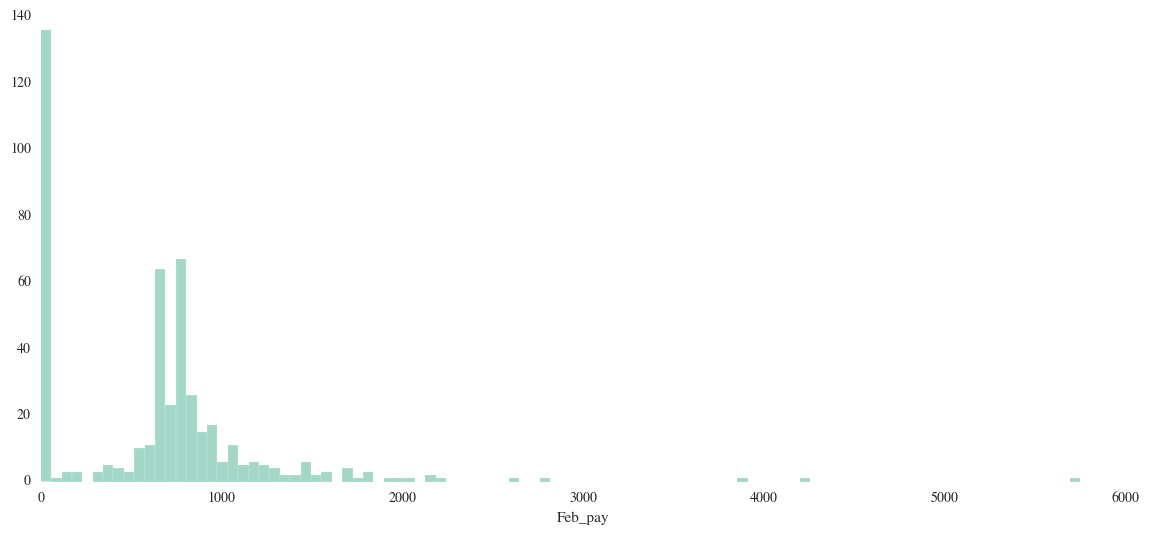

In [9]:
sns.distplot(df8["Feb_pay"][df8['Churn']==1],bins=100,kde=False)

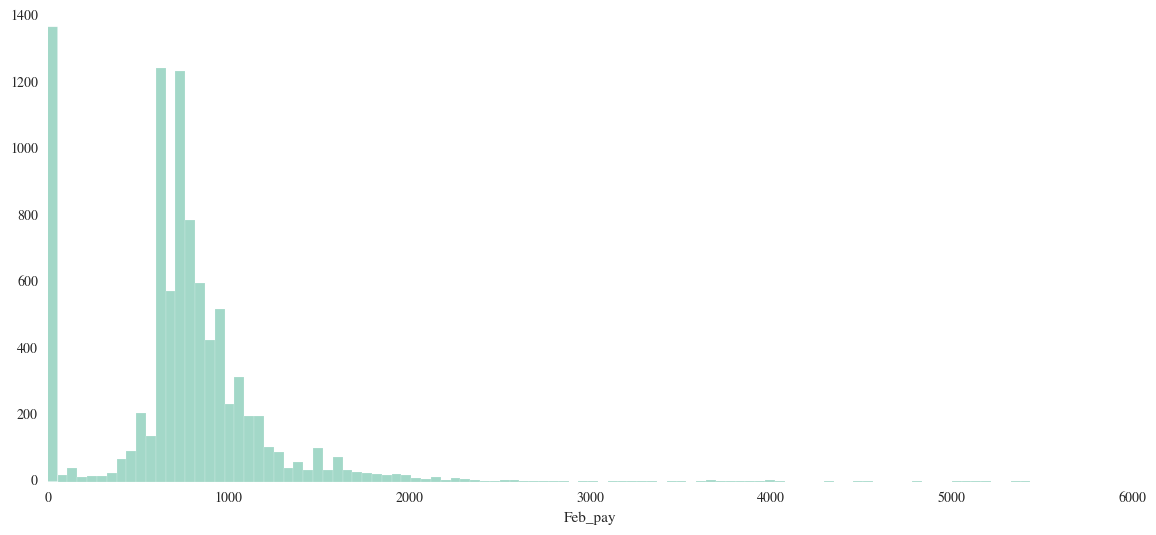

In [10]:
sns.distplot(df8["Feb_pay"][(df8['Churn']==0)&(df8['Feb_pay']<=6000)],bins=100,kde=False)

In [65]:
df8["Feb_pay"][df8['Churn']==1].describe()
df8["Feb_pay"][df8['Churn']==0].describe()
df8["Feb_pay"].describe()

count     462.000000
mean      627.318636
std       594.449406
min         0.000000
25%         0.000000
50%       666.750000
75%       833.883750
max      5748.435000
Name: Feb_pay, dtype: float64

count     9181.000000
mean       752.848696
std        560.098979
min          0.000000
25%        636.090000
50%        749.700000
75%        927.360000
max      23296.035000
Name: Feb_pay, dtype: float64

count     9643.000000
mean       746.834501
std        562.399654
min          0.000000
25%        629.895000
50%        749.385000
75%        921.637500
max      23296.035000
Name: Feb_pay, dtype: float64

In [77]:
df8['Febpb'] = '0-14.25%'
df8['Febpb'][(df8['Feb_pay']>0)&(df8['Feb_pay']<629.8951)]='14.25-25%'
df8['Febpb'][(df8['Feb_pay']>=629.8951)&(df8['Feb_pay']<749.3851)]='25-50%'
df8['Febpb'][(df8['Feb_pay']>=749.3851)&(df8['Feb_pay']<921.63751)]='50-75%'
df8['Febpb'][df8['Feb_pay']>=921.63751]='75-100%'

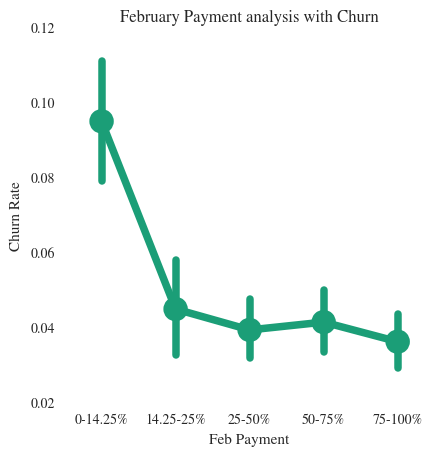

In [79]:
ax = sns.factorplot(x='Febpb',y='Churn',data=df8,size=5,order=['0-14.25%','14.25-25%','25-50%','50-75%','75-100%'])
ax.set(xlabel='Feb Payment',ylabel='Churn Rate',title='February Payment analysis with Churn')

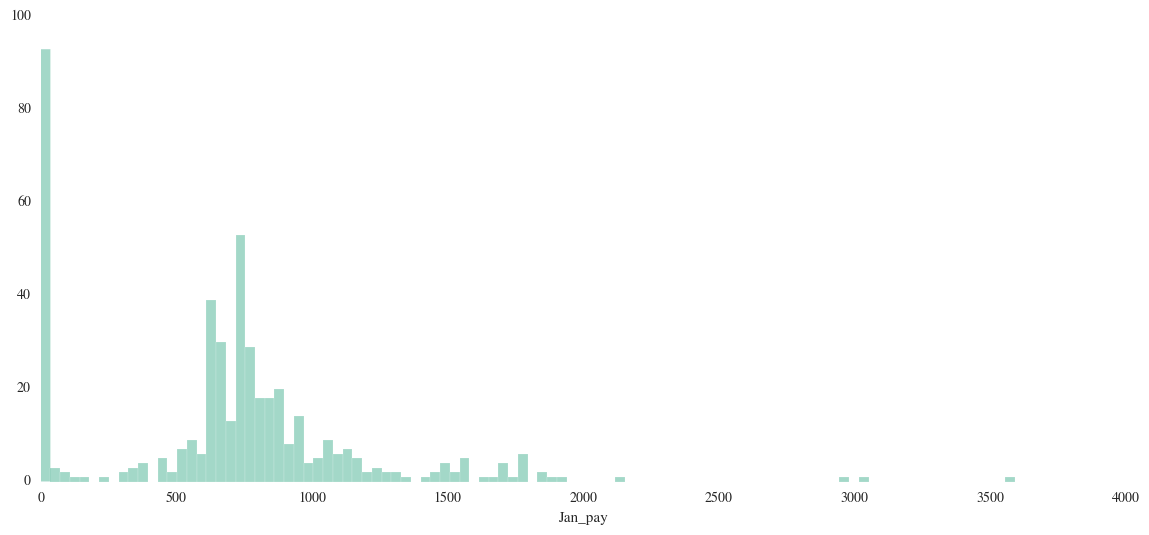

In [13]:
sns.distplot(df8["Jan_pay"][df8['Churn']==1],bins=100,kde=False)

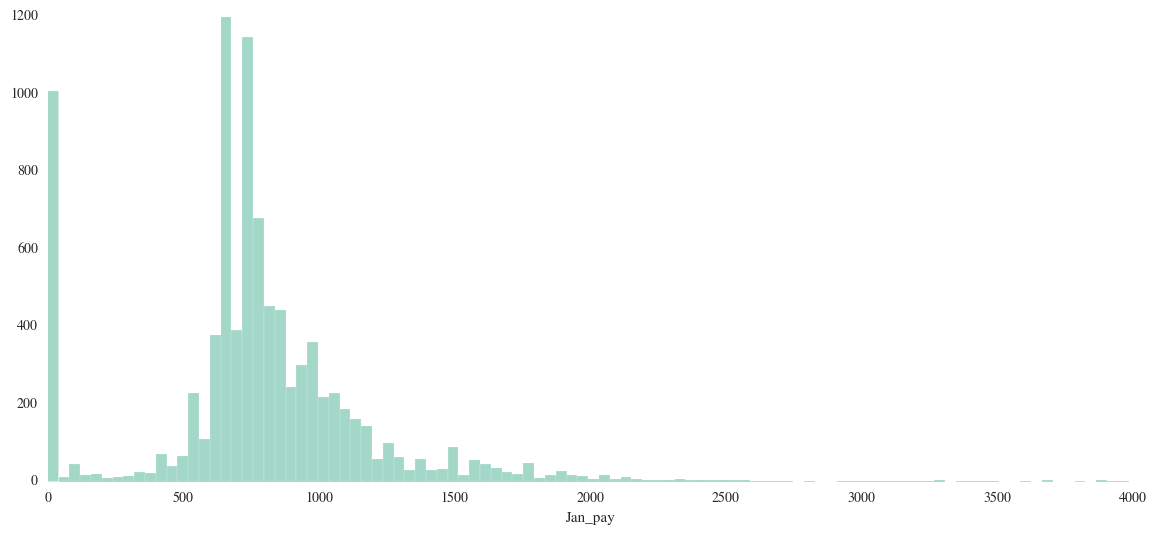

In [16]:
sns.distplot(df8["Jan_pay"][(df8['Churn']==0)&(df8['Jan_pay']<=4000)],bins=100,kde=False)

In [82]:
df8["Jan_pay"].describe()

count     9643.000000
mean       786.193222
std        547.979089
min          0.000000
25%        643.860000
50%        751.695000
75%        950.880000
max      22487.850000
Name: Jan_pay, dtype: float64

In [88]:
df8['Janpb'] = '0 Pay(10%)'
df8['Janpb'][(df8['Jan_pay']>0)&(df8['Jan_pay']<643.861)]='9.9-25%'
df8['Janpb'][(df8['Jan_pay']>=643.861)&(df8['Jan_pay']<751.6951)]='25-50%'
df8['Janpb'][(df8['Jan_pay']>=751.6951)&(df8['Jan_pay']<950.881)]='50-75%'
df8['Janpb'][df8['Jan_pay']>=950.881]='75-100%'

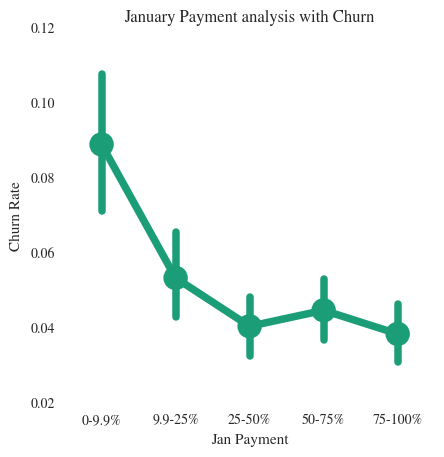

In [90]:
ax = sns.factorplot(x='Janpb',y='Churn',data=df8,size=5,order=['0-9.9%','9.9-25%','25-50%','50-75%','75-100%'])
ax.set(xlabel='Jan Payment',ylabel='Churn Rate',title='January Payment analysis with Churn')

In [87]:
(954+1458)/(954+1458+2407+2411+2413)

0.25012962770921915

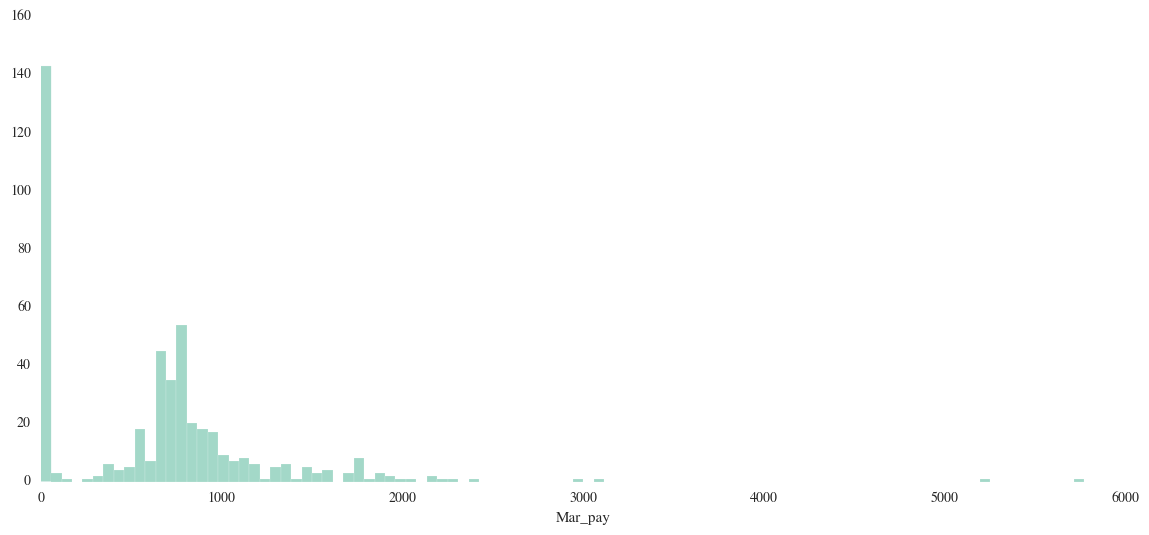

In [17]:
sns.distplot(df8["Mar_pay"][df8['Churn']==1],bins=100,kde=False)

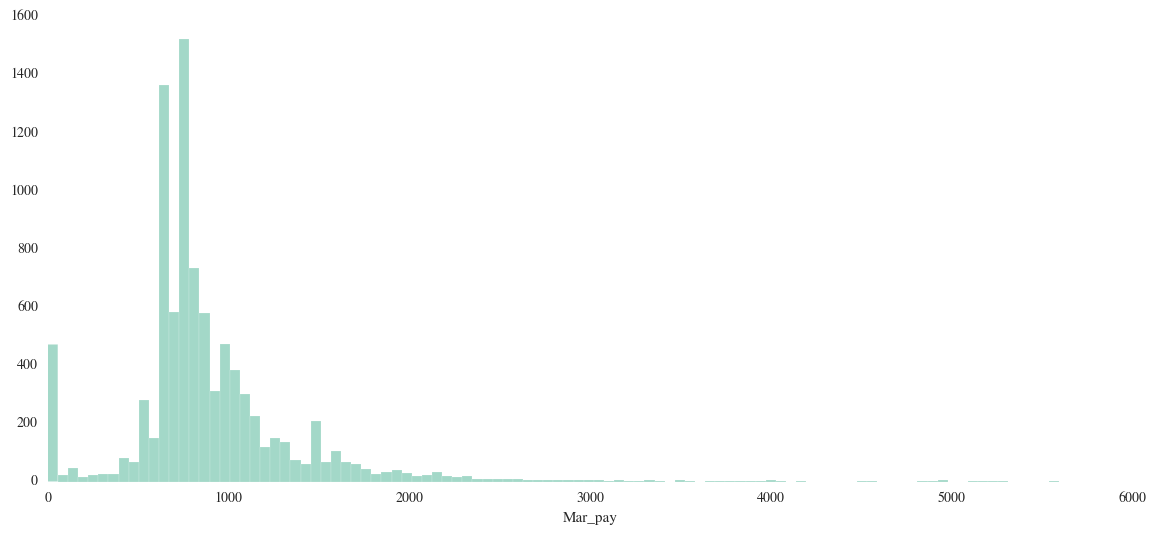

In [22]:
sns.distplot(df8["Mar_pay"][(df8['Churn']==0)&(df8['Mar_pay']<=6000)],bins=100,kde=False)

In [31]:
df8["Mar_pay"][df8['Churn']==1].describe()
df8["Mar_pay"][df8['Churn']==0].describe()
df8["Mar_pay"].describe()

count     462.000000
mean      646.500682
std       635.165628
min         0.000000
25%         0.000000
50%       682.290000
75%       870.922500
max      5770.275000
Name: Mar_pay, dtype: float64

count     9181.000000
mean       895.389107
std        606.947314
min          0.000000
25%        648.900000
50%        782.250000
75%       1019.340000
max      23261.910000
Name: Mar_pay, dtype: float64

count     9643.000000
mean       883.464763
std        610.613286
min          0.000000
25%        648.165000
50%        777.210000
75%       1013.040000
max      23261.910000
Name: Mar_pay, dtype: float64

In [58]:
df8['Marpb'] = '0-5%'
df8['Marpb'][(df8['Mar_pay']>0)&(df8['Mar_pay']<648.17)]='5-25%'
df8['Marpb'][(df8['Mar_pay']>=648.17)&(df8['Mar_pay']<777.22)]='25-50%'
df8['Marpb'][(df8['Mar_pay']>=777.22)&(df8['Mar_pay']<1014)]='50-75%'
df8['Marpb'][df8['Mar_pay']>=1014]='75-100%'

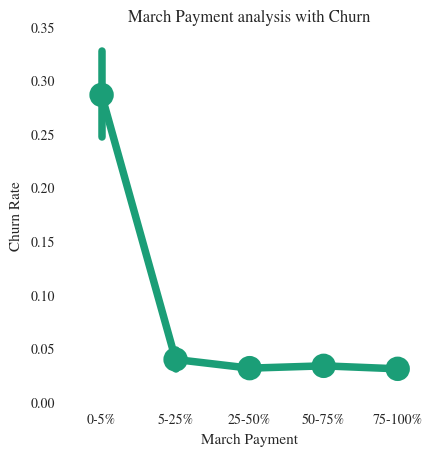

In [64]:
ax = sns.factorplot(x='Marpb',y='Churn',data=df8,size=5,order=['0-5%','5-25%','25-50%','50-75%','75-100%'])
ax.set(xlabel='March Payment',ylabel='Churn Rate',title='March Payment analysis with Churn')

d    2415
e    2406
c    2391
b    1945
a     486
Name: Marpb, dtype: int64

In [57]:
(486+1945+2391)/(486+1945+2391+2406+2415)

0.5000518510836877